In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl




%matplotlib inline

In [245]:
import matplotlib as mpl
mpl.rcParams['ytick.direction'] = 'in' 
mpl.rcParams['xtick.direction'] = 'in' # 设定坐标轴刻度方向朝里

In [246]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False
#设定 中文字体 和尺寸（在ubuntn中字体名字有待考证）

In [253]:
def generateThroughput(pname,pmean,pmin,pmax,pfidir,plengeth=120,offset = 0):
    pdata = pmean + np.random.uniform(pmin,pmax,plengeth)
    ptdir = {}
    for x in pfidir.keys():
        ptdir[x] = pfidir[x]
    #xth = [i for i in range(plengeth)]
    for i in range(plengeth):
        ptdir[i*5+offset] = pdata[i]
    pds = pd.Series(data=ptdir,index=ptdir.keys())
    pdt = pd.DataFrame(data=pds,index=pds.index,columns=[pname])
    pdt['time'] = pdt.index
    return pdt

## 数据生成函数

In [254]:
dmfdir = {0:0.0,5:720}
usfdir = {0:0.0,8:360}
ctfdir = {0:0.0,14:120}
tdfdir = {0:0.0,27:50}

In [255]:
DMTDMAthr = generateThroughput('DM-TDMA', 759.88, -15,15,pfidir=dmfdir,plengeth=119,offset = 5)
CLUSAPthr = generateThroughput('CL-USAP', 390.88, -25,25,pfidir=usfdir,plengeth=118,offset = 10)
CLTDMAthr = generateThroughput('CL-TDMA', 138.88, -30,30,pfidir=ctfdir,plengeth=117,offset = 15)
TDMAthr = generateThroughput('TDMA', 62.88, -35,35,pfidir=tdfdir,plengeth=114,offset = 30)

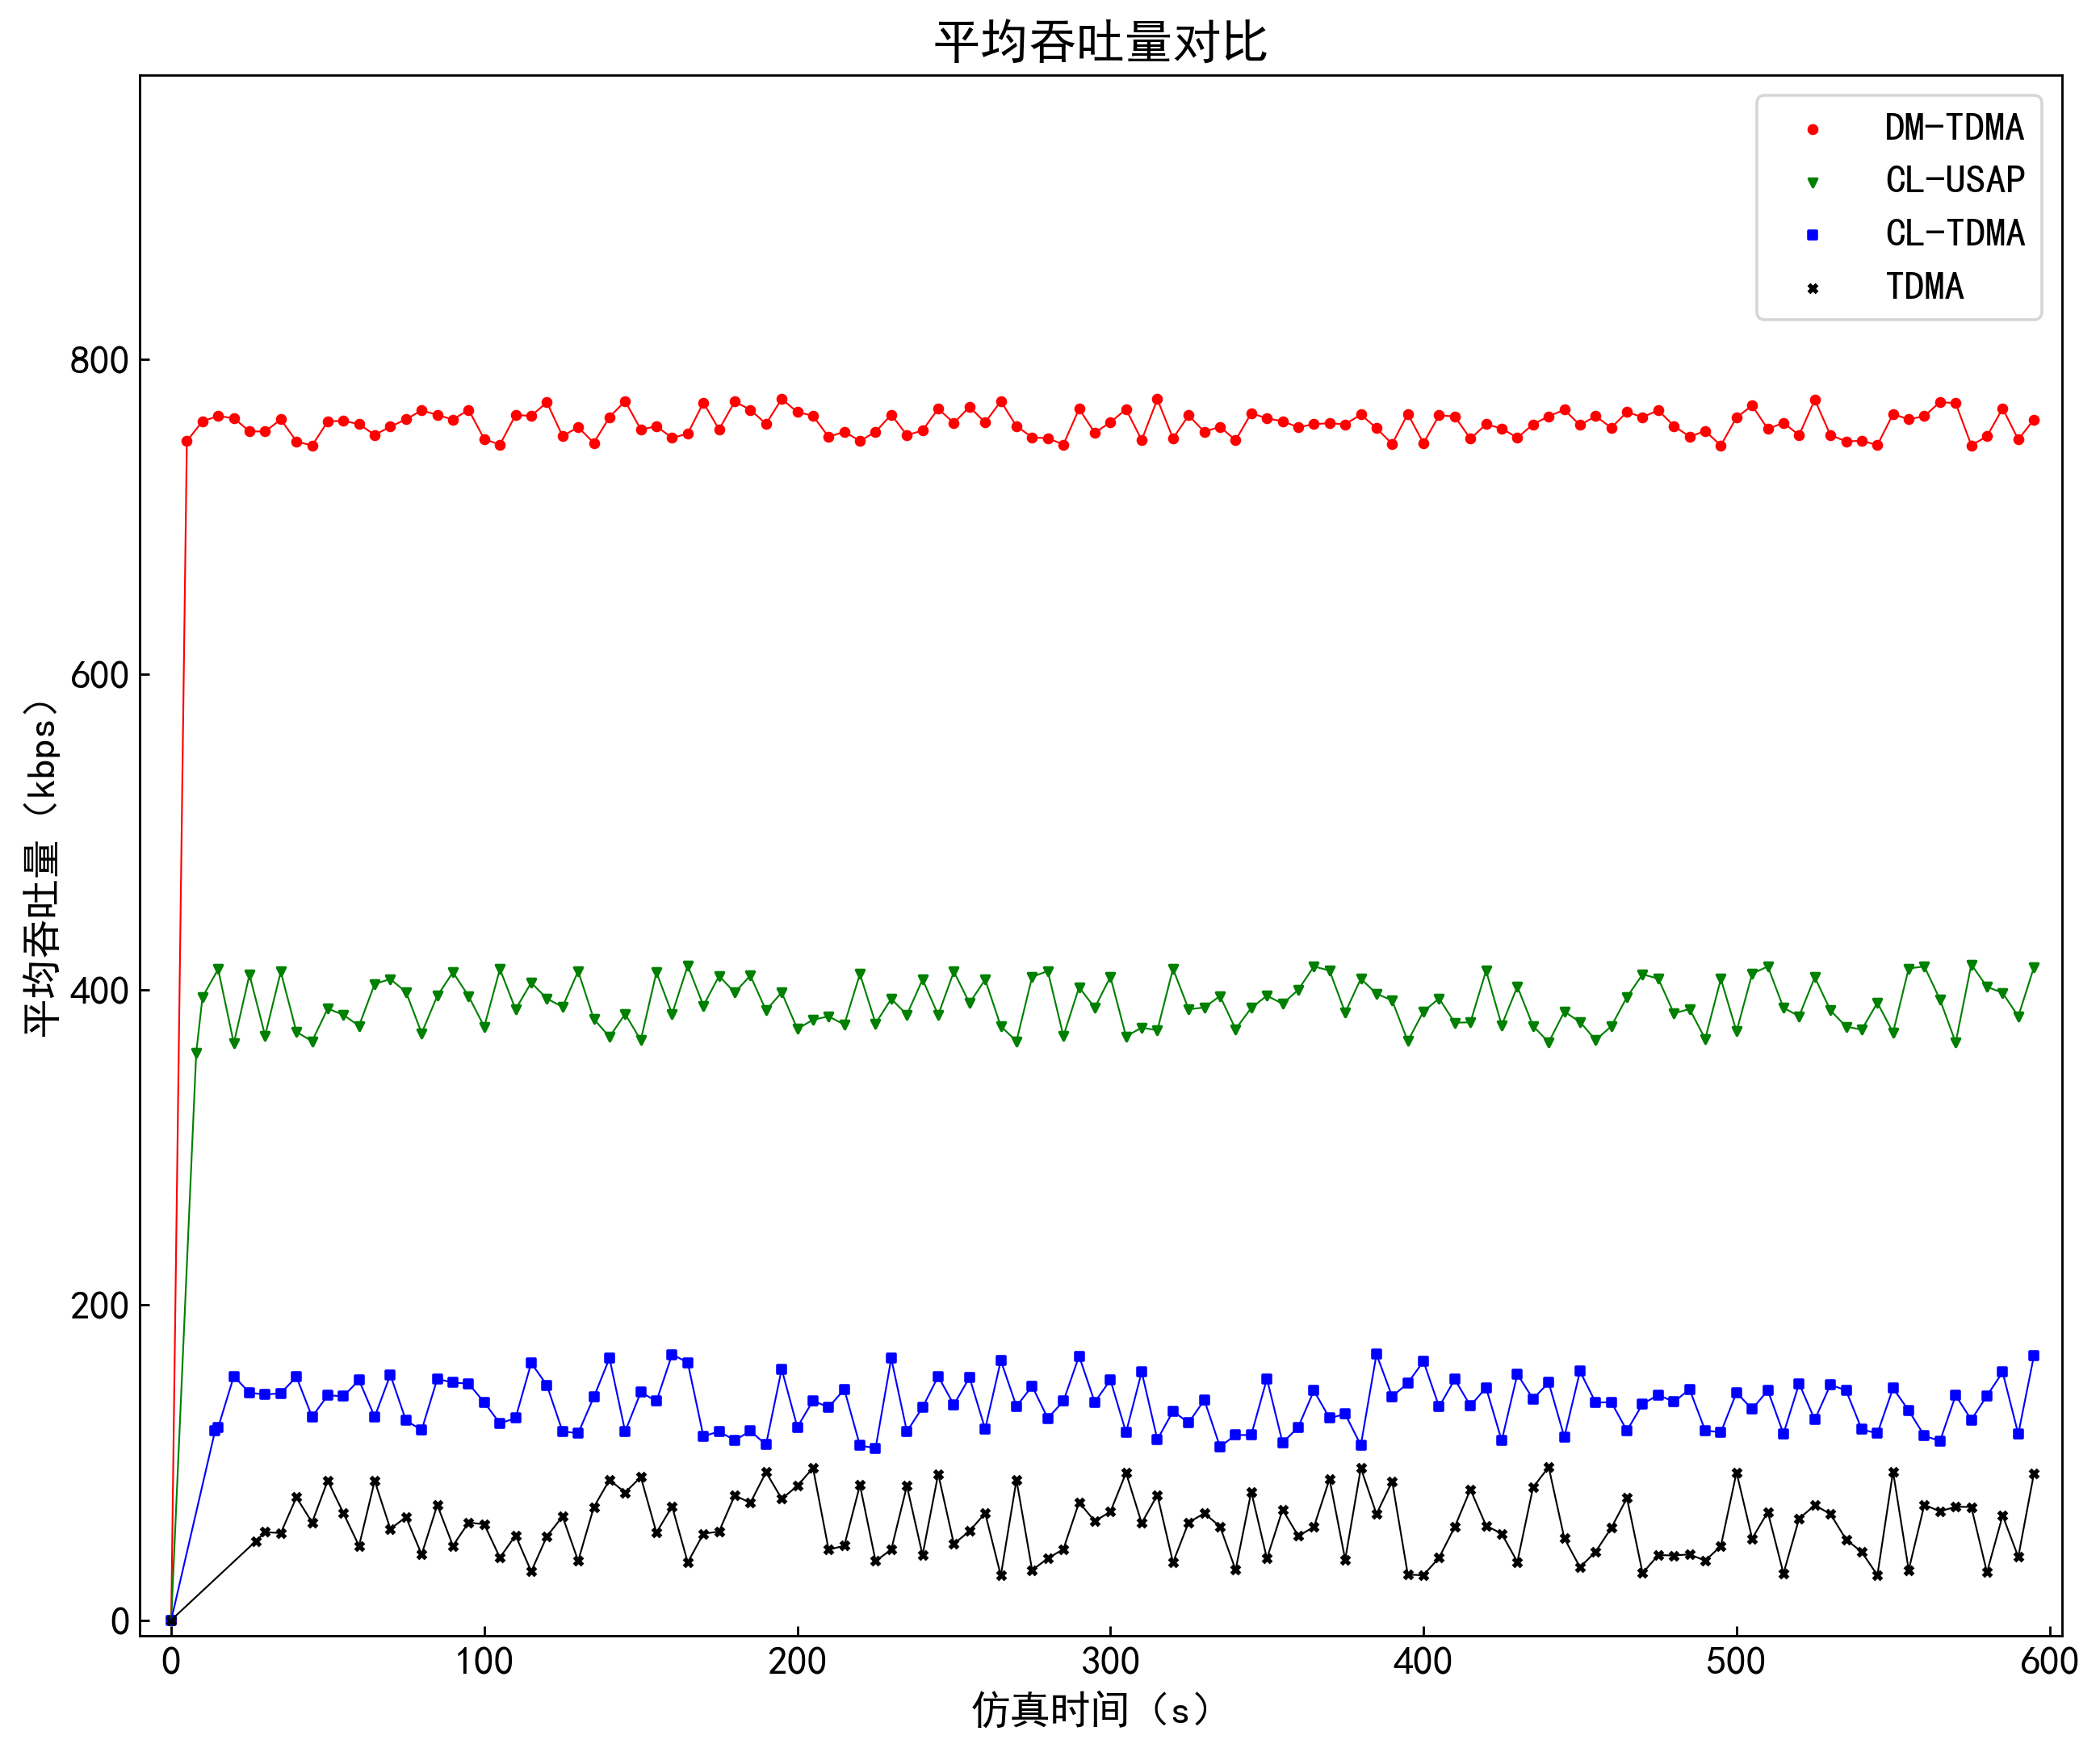

In [257]:
# Just a figure and one subplot
f, ax = plt.subplots(figsize=(12,10),dpi=256)
#指定 图形大小和分辨率
ax.set_ylim(-10,980)
DMTDMAthr['DM-TDMA'].plot(ax=ax,linewidth=0.6,c='r')
CLUSAPthr['CL-USAP'].plot(ax=ax,linewidth=0.6,c='g')
CLTDMAthr['CL-TDMA'].plot(ax=ax,linewidth=0.6,c='b')
TDMAthr['TDMA'].plot(ax=ax,linewidth=0.6,c='black')
#ax.plot(x, y)
#ax.set_title('Simple plot')

DMTDMAthr.plot(kind='scatter',x='time',y='DM-TDMA',s=8,label='DM-TDMA',ax=ax,marker='o',c='r',xlim=(-10,604))
CLUSAPthr.plot(kind='scatter',x='time',y='CL-USAP',s=8,label='CL-USAP',ax=ax,marker='v',c='g',xlim=(-10,604))
CLTDMAthr.plot(kind='scatter',x='time',y='CL-TDMA',s=8,label='CL-TDMA',ax=ax,marker='s',c='b',xlim=(-10,604))
TDMAthr.plot(kind='scatter',x='time',y='TDMA',s=8,label='TDMA',ax=ax,marker='x',c='black',xlim=(-10,604))

plt.xlabel('仿真时间（s）')
plt.ylabel('平均吞吐量（kbps）')
plt.title('平均吞吐量对比')
plt.savefig('ALLThroughput.png',bbox_inches='tight')
#去除默认保存时的坐标轴的白边过大
#plt.subplots(ncols=1,nrows=1)

In [258]:
dmfdird = {0:0.0,5:30.1}
usfdird = {0:0.0,8:110.2}

ctfdird = {0:0.0,14:116.2}
tdfdird = {0:0.0,27:188.5}

In [259]:
DMTDMAdelay = generateThroughput('DM-TDMA', 29.28, -3,3,pfidir=dmfdird,plengeth=119,offset = 5)
CLUSAPdelay = generateThroughput('CL-USAP', 92.38, -8,8,pfidir=usfdird,plengeth=118,offset = 10)
CLTDMAdelay = generateThroughput('CL-TDMA', 115.18, -12,12,pfidir=ctfdird,plengeth=117,offset = 15)
TDMAdelay = generateThroughput('TDMA', 186.08, -26,26,pfidir=tdfdird,plengeth=114,offset = 30)

In [260]:
CLUSAPdelay.loc[10] = [105,10.0]

In [261]:
#CLUSAPdelay

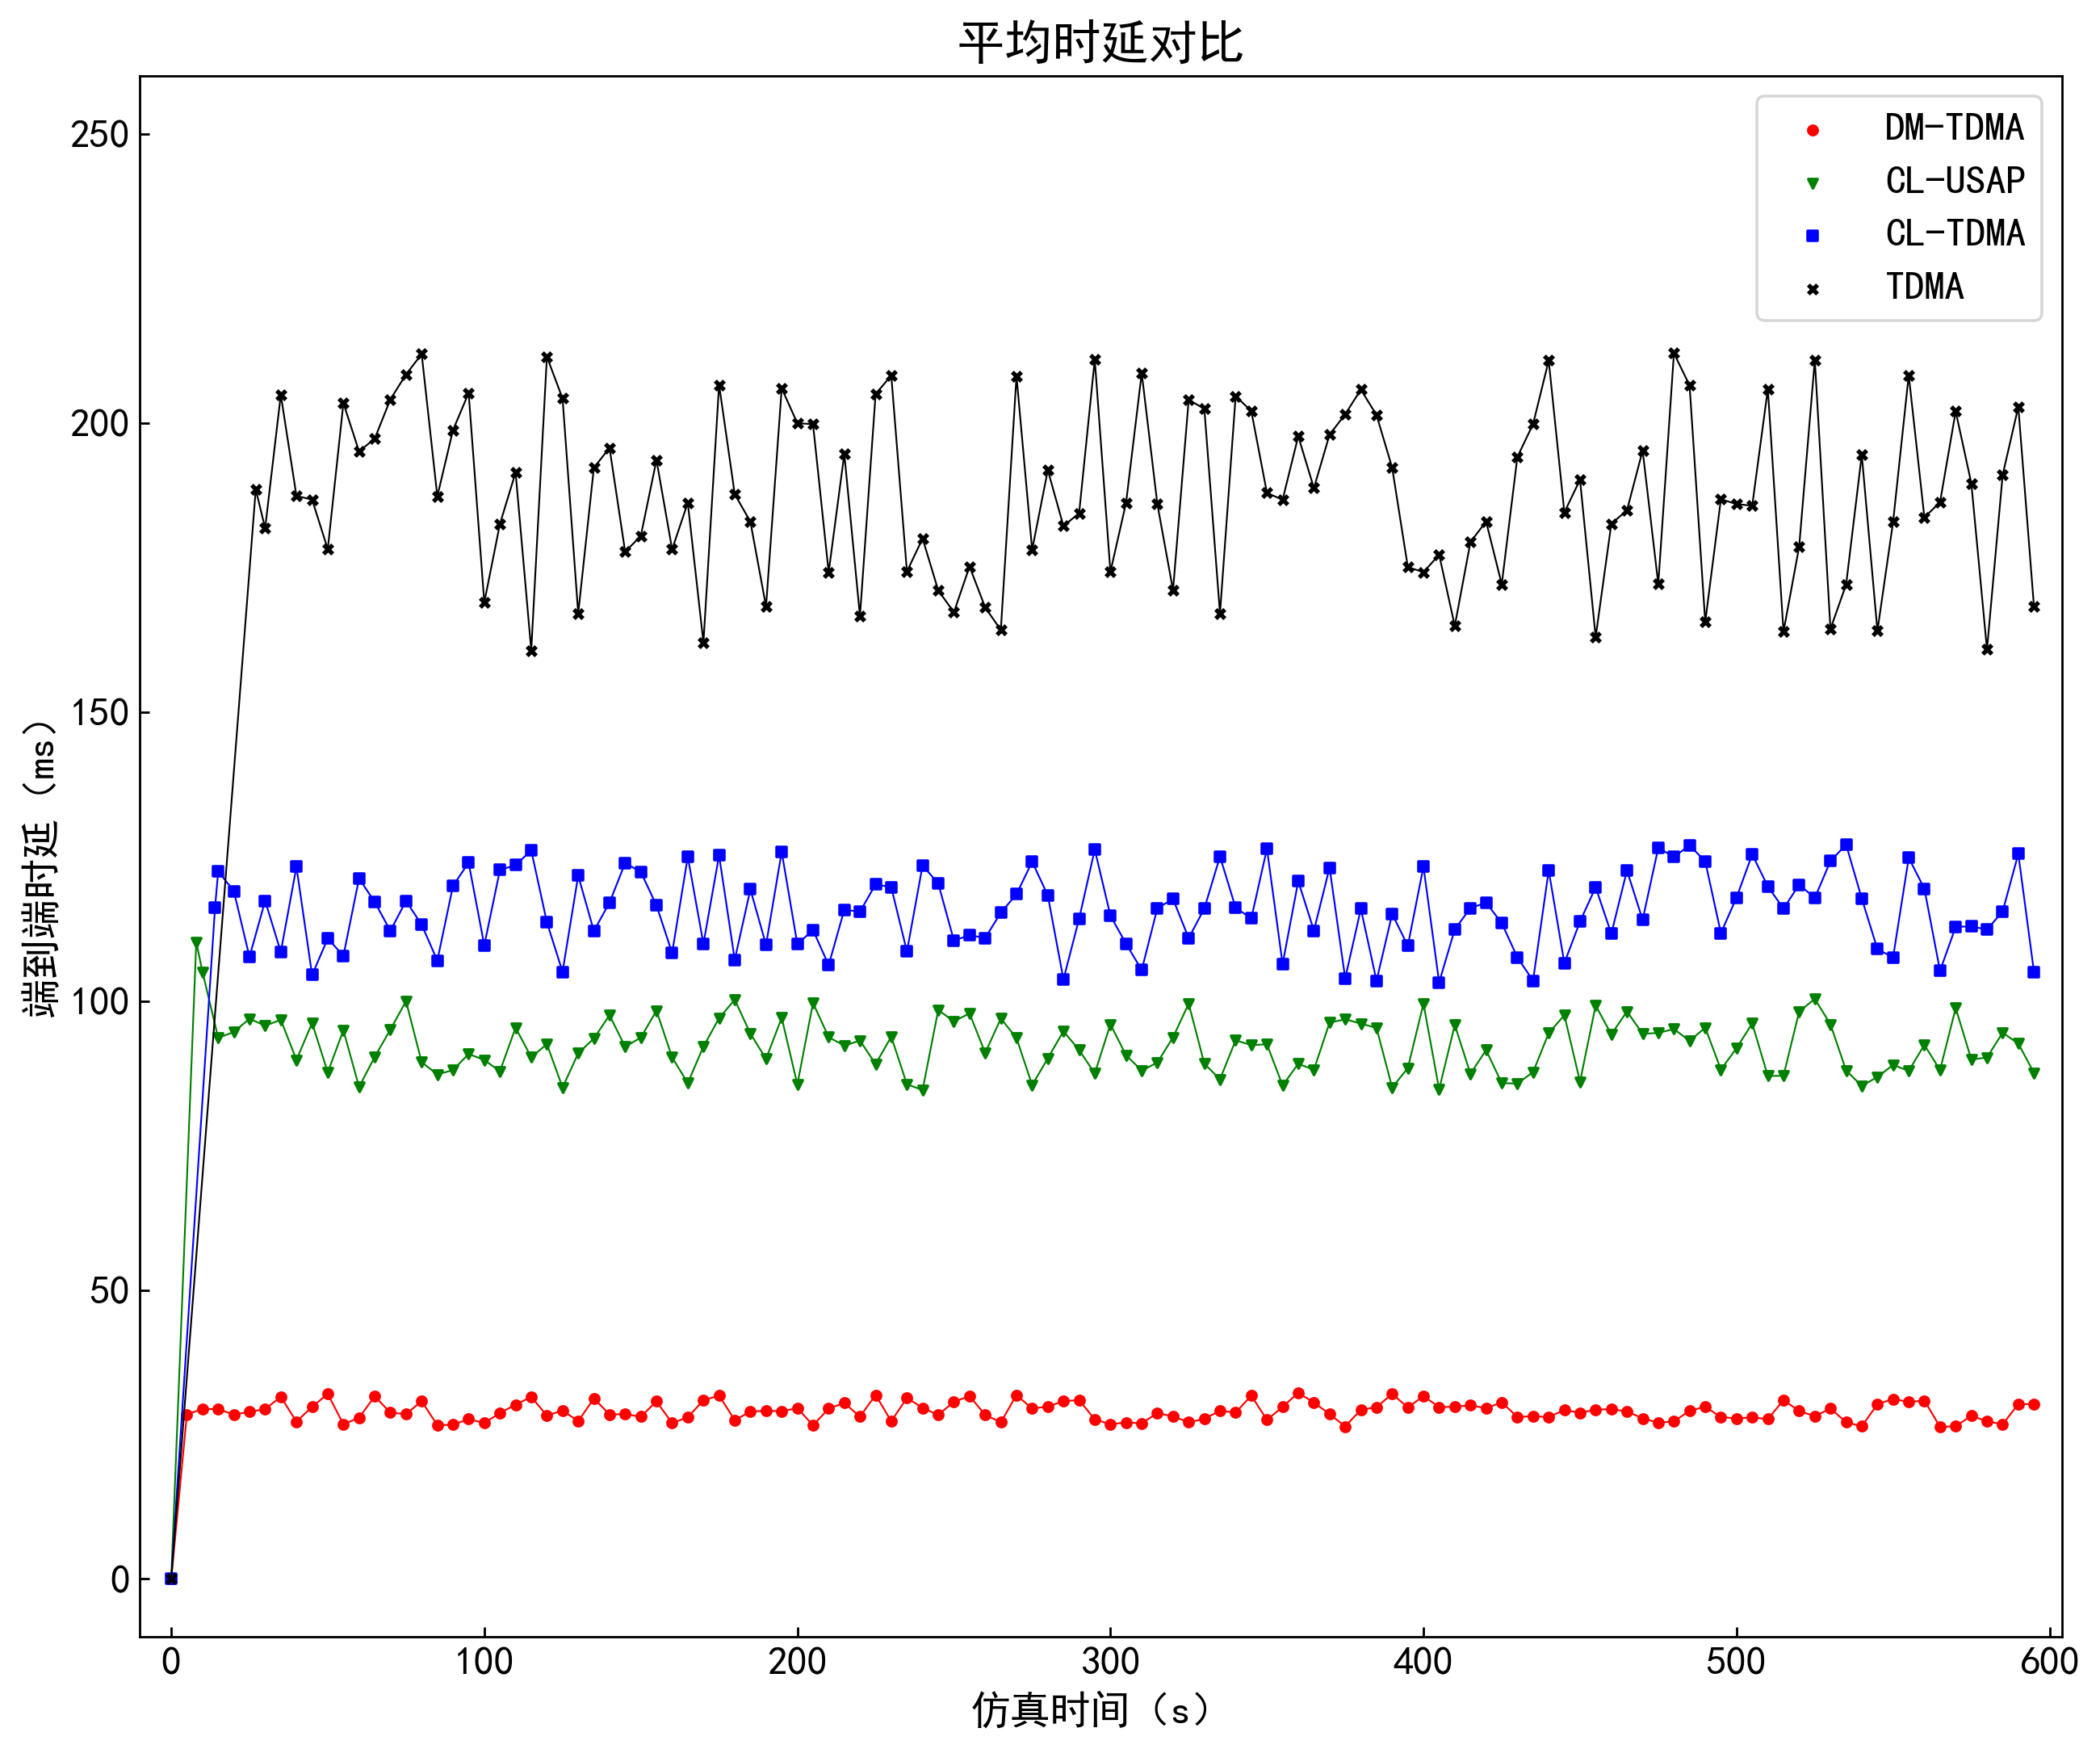

In [262]:
# Just a figure and one subplot
f, ax = plt.subplots(figsize=(12,10),dpi=256)
ax.set_ylim(-10,260)
DMTDMAdelay['DM-TDMA'].plot(ax=ax,linewidth=0.6,c='r')
CLUSAPdelay['CL-USAP'].plot(ax=ax,linewidth=0.6,c='g')
CLTDMAdelay['CL-TDMA'].plot(ax=ax,linewidth=0.6,c='b')
TDMAdelay['TDMA'].plot(ax=ax,linewidth=0.6,c='black')
#ax.plot(x, y)
#ax.set_title('Simple plot')

DMTDMAdelay.plot(kind='scatter',x='time',y='DM-TDMA',s=10,label='DM-TDMA',ax=ax,marker='o',c='r',xlim=(-10,604))
CLUSAPdelay.plot(kind='scatter',x='time',y='CL-USAP',s=10,label='CL-USAP',ax=ax,marker='v',c='g',xlim=(-10,604))
CLTDMAdelay.plot(kind='scatter',x='time',y='CL-TDMA',s=10,label='CL-TDMA',ax=ax,marker='s',c='b',xlim=(-10,604))
TDMAdelay.plot(kind='scatter',x='time',y='TDMA',s=10,label='TDMA',ax=ax,marker='x',c='black',xlim=(-10,604))

plt.xlabel('仿真时间（s）')
plt.ylabel('端到端时延（ms）')
plt.title('平均时延对比')
plt.savefig('ALLDelay.png',bbox_inches='tight')
#plt.subplots(ncols=1,nrows=1)
plt.show()

In [263]:
dmfdirj = {0:0.0,5:3.9}
usfdirj = {0:0.0,8:7.3}
ctfdirj = {0:0.0,14:11.96}
tdfdirj = {0:0.0,27:23.89}

In [264]:
DMTDMAjitter = generateThroughput('DM-TDMA', 3.828, -1,1,pfidir=dmfdirj,plengeth=119,offset = 5)
CLUSAPjitter = generateThroughput('CL-USAP', 7.18, -2,2,pfidir=usfdirj,plengeth=118,offset = 10)
CLTDMAjitter = generateThroughput('CL-TDMA', 11.81, -3,3,pfidir=ctfdirj,plengeth=117,offset = 15)
TDMAjitter = generateThroughput('TDMA', 23.48, -4,4,pfidir=tdfdirj,plengeth=114,offset = 30)

In [265]:
#DMTDMAjitter

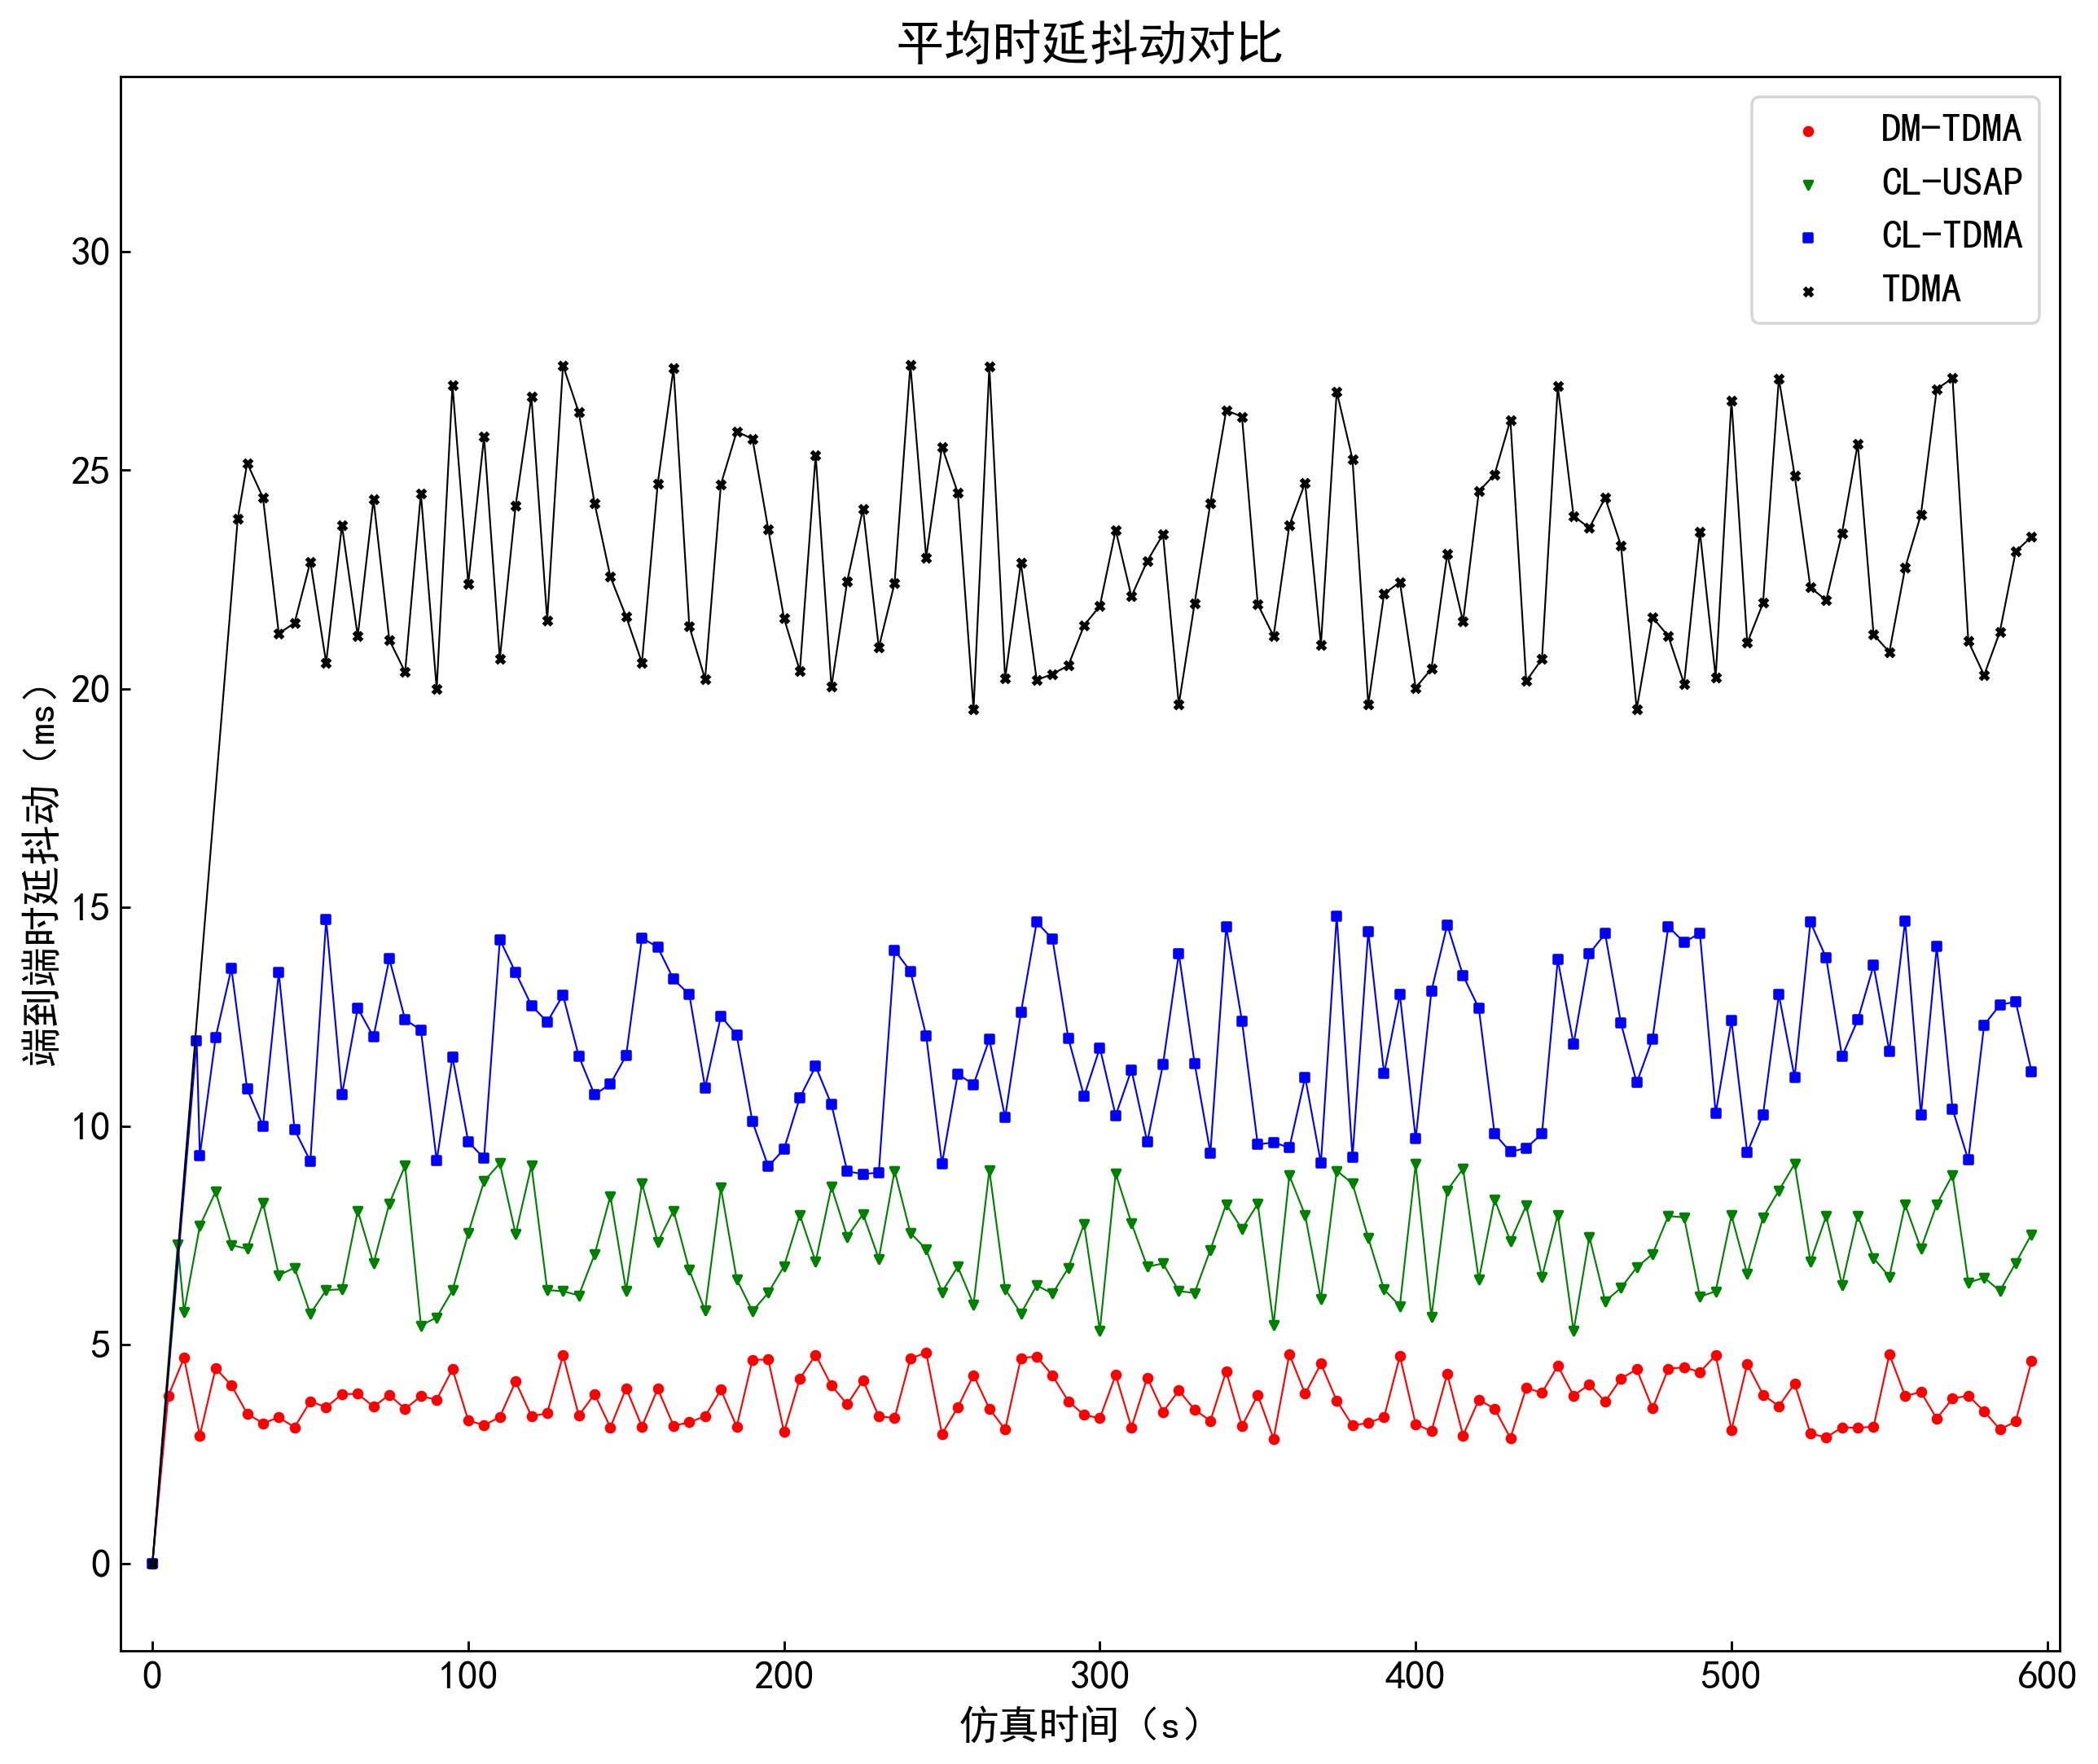

In [266]:
# Just a figure and one subplot
f, ax = plt.subplots(figsize=(12,10),dpi=256)
ax.set_ylim(-2,34)
ax.set_xmargin
DMTDMAjitter['DM-TDMA'].plot(ax=ax,linewidth=0.6,c='r')
CLUSAPjitter['CL-USAP'].plot(ax=ax,linewidth=0.6,c='g')
CLTDMAjitter['CL-TDMA'].plot(ax=ax,linewidth=0.6,c='b')
TDMAjitter['TDMA'].plot(ax=ax,linewidth=0.6,c='black')
#ax.plot(x, y)
#ax.set_title('Simple plot')

DMTDMAjitter.plot(kind='scatter',x='time',y='DM-TDMA',s=8,label='DM-TDMA',ax=ax,marker='o',c='r',xlim=(-10,604))
CLUSAPjitter.plot(kind='scatter',x='time',y='CL-USAP',s=8,label='CL-USAP',ax=ax,marker='v',c='g',xlim=(-10,604))
CLTDMAjitter.plot(kind='scatter',x='time',y='CL-TDMA',s=8,label='CL-TDMA',ax=ax,marker='s',c='b',xlim=(-10,604))
TDMAjitter.plot(kind='scatter',x='time',y='TDMA',s=8,label='TDMA',ax=ax,marker='x',c='black',xlim=(-10,604))

plt.xlabel('仿真时间（s）')
plt.ylabel('端到端时延抖动（ms）')
plt.title('平均时延抖动对比')
plt.savefig('allJitter.png',bbox_inches='tight')
#plt.subplots(ncols=1,nrows=1)

In [267]:
dmtdma = pd.read_csv('dmtdma.csv')

In [268]:
dmtdma['throughput'] =  dmtdma['throughput'] / 1000

In [269]:
dmtdma

,offerload,throughput,delay
0,600,600.310,24.88
1,666,666.800,26.19
2,750,742.563,29.58
3,857,849.381,72.22
4,1000,979.178,146.47
5,1200,1158.070,259.31
6,1500,1409.826,349.34
7,1578,1453.590,443.37
8,1620,1470.161,623.53
9,1660,1489.661,709.10


In [270]:
for x in dmtdma['throughput']:
    print(x)

600.31
666.8
742.563
849.381
979.178
1158.07
1409.826
1453.59
1470.161
1489.661
1496.261


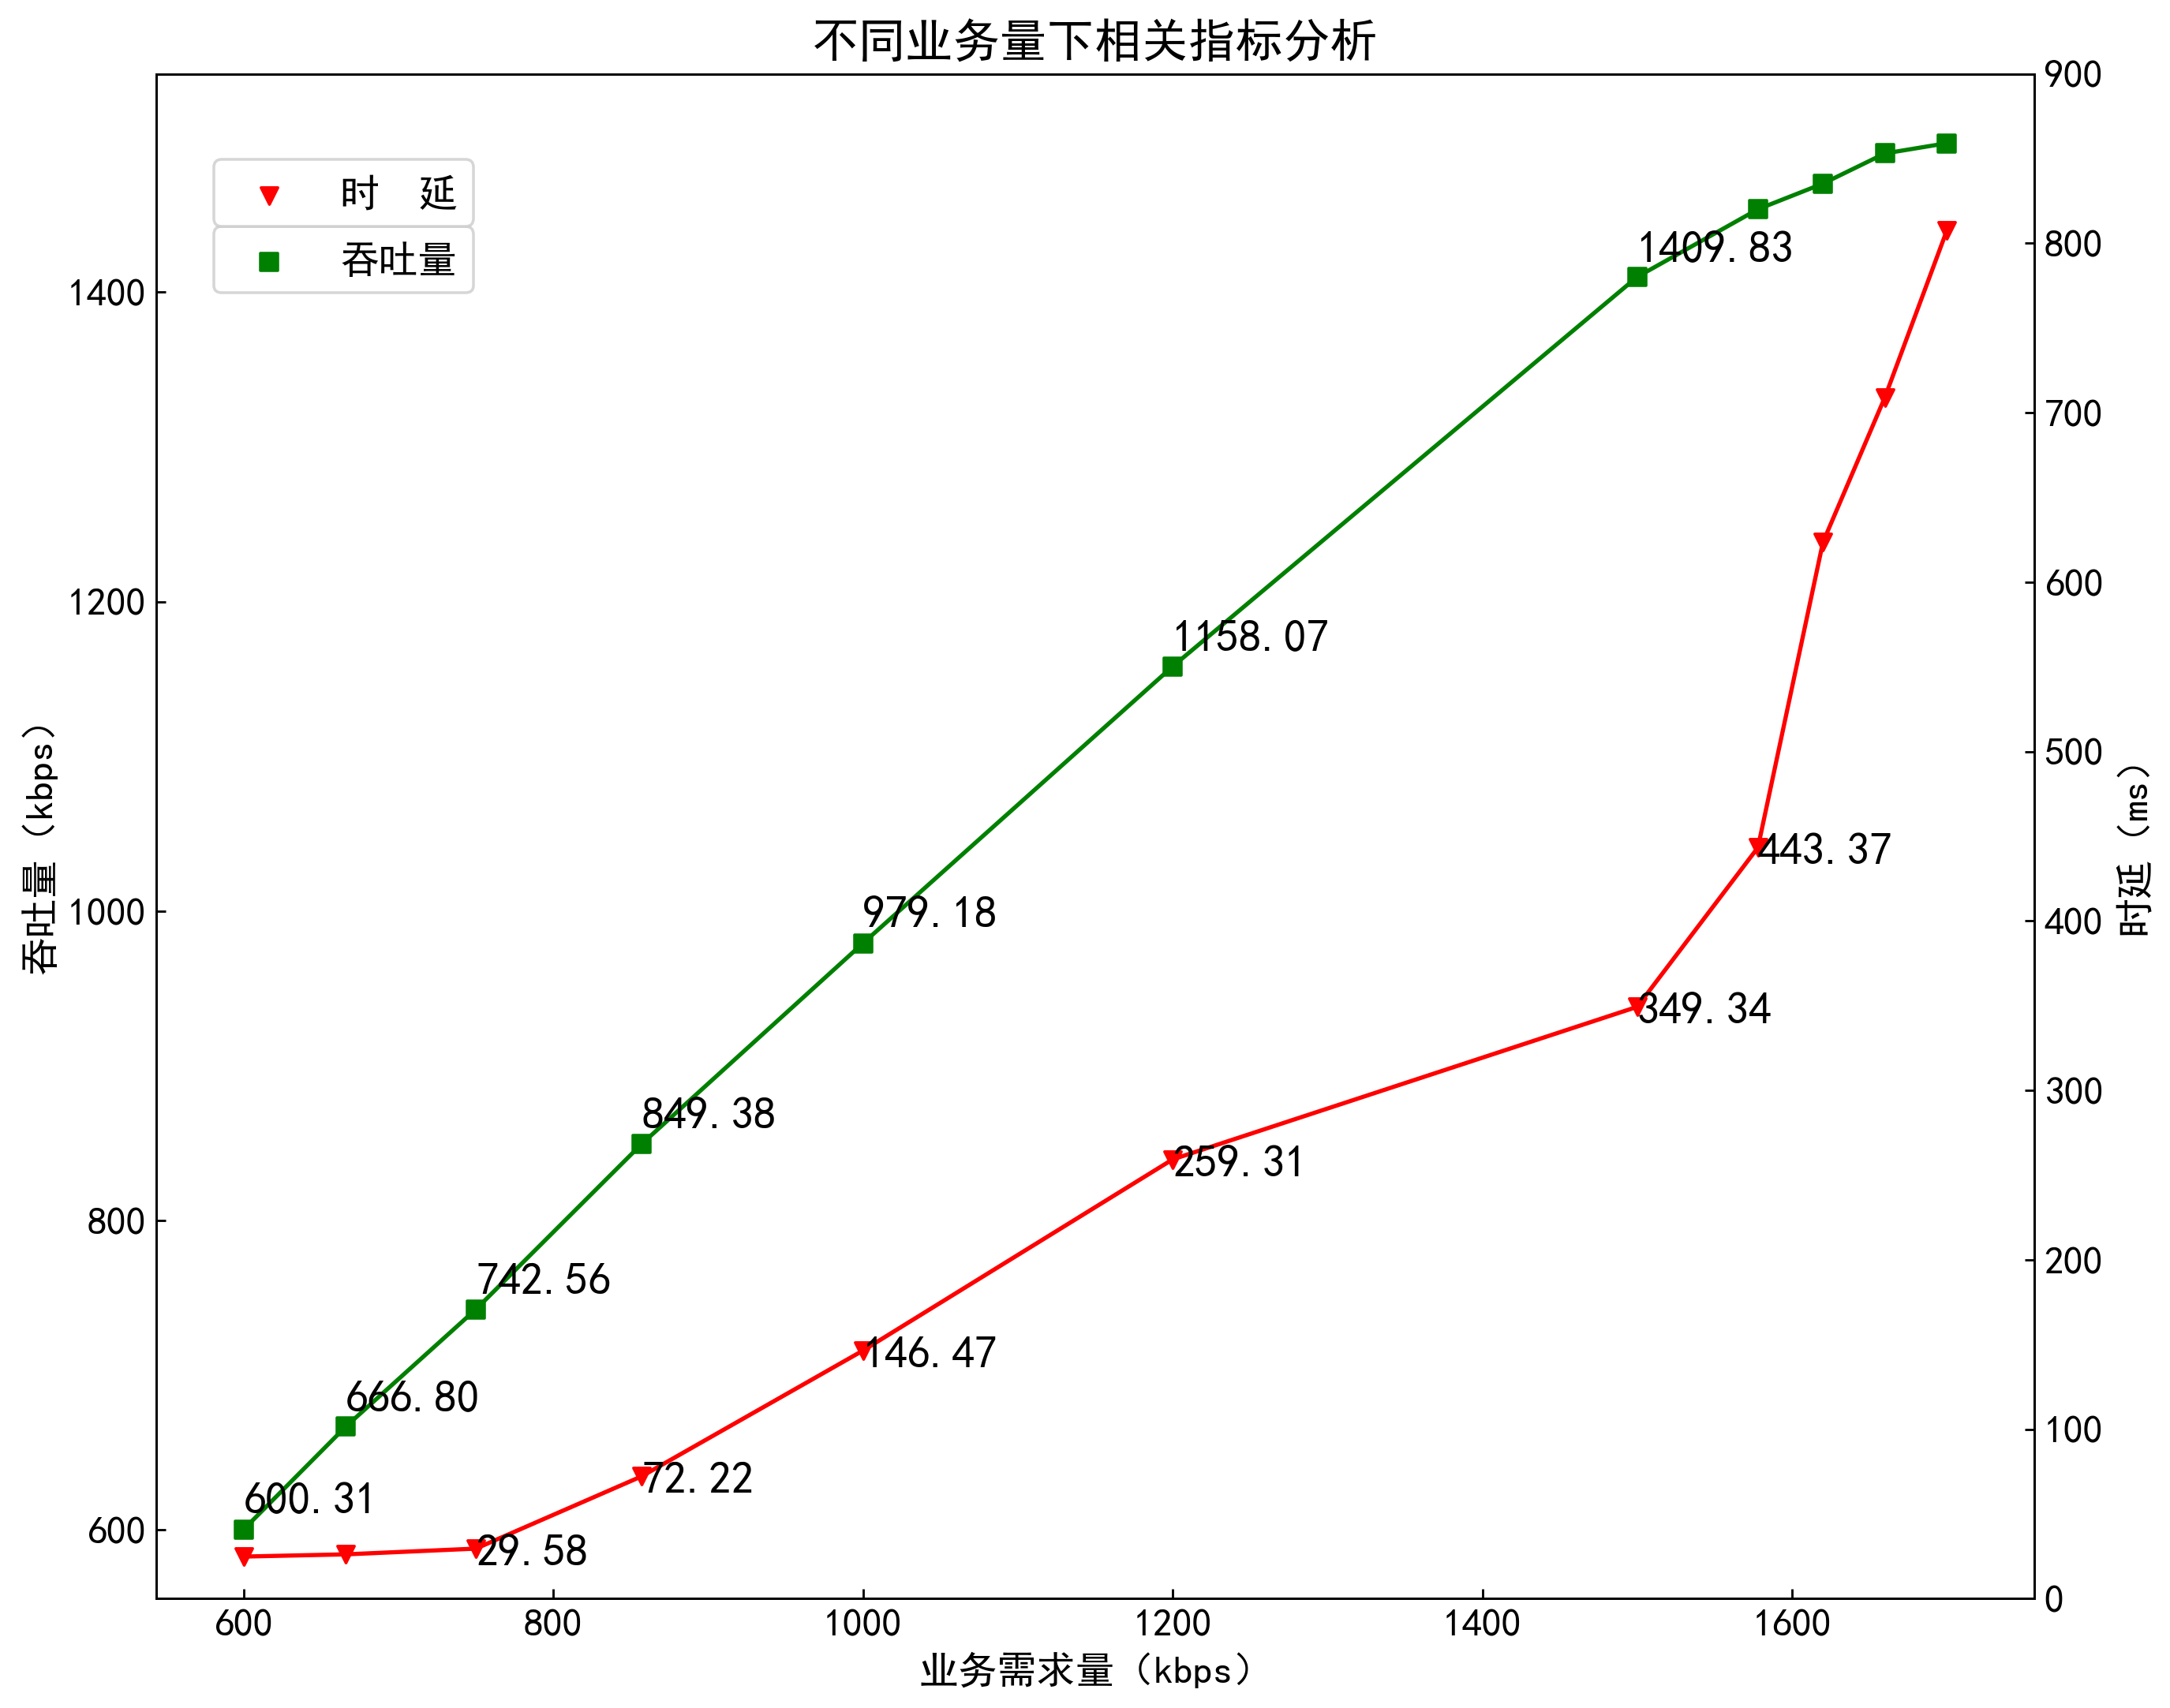

In [271]:
# Just a figure and one subplot
f, ax = plt.subplots(figsize=(12,10),dpi=256)
#ax.set_ylim(-2,34)
#ax.set_ylim(500,1600)
la1 = ax.scatter(dmtdma['offerload'],dmtdma['throughput'],c='g',label='吞吐量',marker='s')
ax.legend(loc=9, bbox_to_anchor=(0.1,0.9),borderaxespad = 0.)
#plt.legend()
ax.plot(dmtdma['offerload'],dmtdma['throughput'],c='g')
for xi,yi in zip(dmtdma['offerload'][:7],dmtdma['throughput'][:7]):
    ax.text(xi,yi+10,s='%.2f' % (yi),fontsize=16)


ax.set_ylabel('吞吐量（kbps）')
ax.set_xlabel('业务需求量（kbps）')
ax1 = ax.twinx()
ax1.set_ylabel('时延（ms）')
ax1.set_ylim(0,900)
#ax1.set_xticks([0,30,100,200,300,400,500,600,700,800])
la2 =ax1.scatter(dmtdma['offerload'],dmtdma['delay'],c='r',label='时  延',marker='v')
ax1.legend(loc=8, bbox_to_anchor=(0.1,0.9),borderaxespad = 0.)
#plt.legend(loc=0)

ax1.plot(dmtdma['offerload'],dmtdma['delay'],c='r')
for xi,yi in zip(dmtdma['offerload'][2:8],dmtdma['delay'][2:8]):
    ax1.text(xi,yi-10,s='%.2f' % (yi),fontsize=16)
plt.title('不同业务量下相关指标分析')
plt.savefig('DMtdma.png',bbox_inches='tight')

In [272]:
sucDataFrame = pd.read_excel('expData0521.xlsx',sheetname='successful rate').T

In [273]:
sucDataFrame['offer'] = sucDataFrame.index

In [274]:
sucDataFrame

,DM-TDMA,CL-USAP,CL-TDMA,TDMA,offer
400,1.000,1.000,1.000,1.000,400
600,1.000,1.000,1.000,0.989,600
800,1.000,1.000,0.996,0.912,800
1000,1.000,0.997,0.985,0.897,1000
1200,1.000,0.984,0.972,0.808,1200
1500,1.000,0.968,0.942,0.768,1500
2000,1.000,0.953,0.925,0.576,2000
2400,0.977,0.944,0.866,0.481,2400
3000,0.956,0.928,0.716,0.420,3000


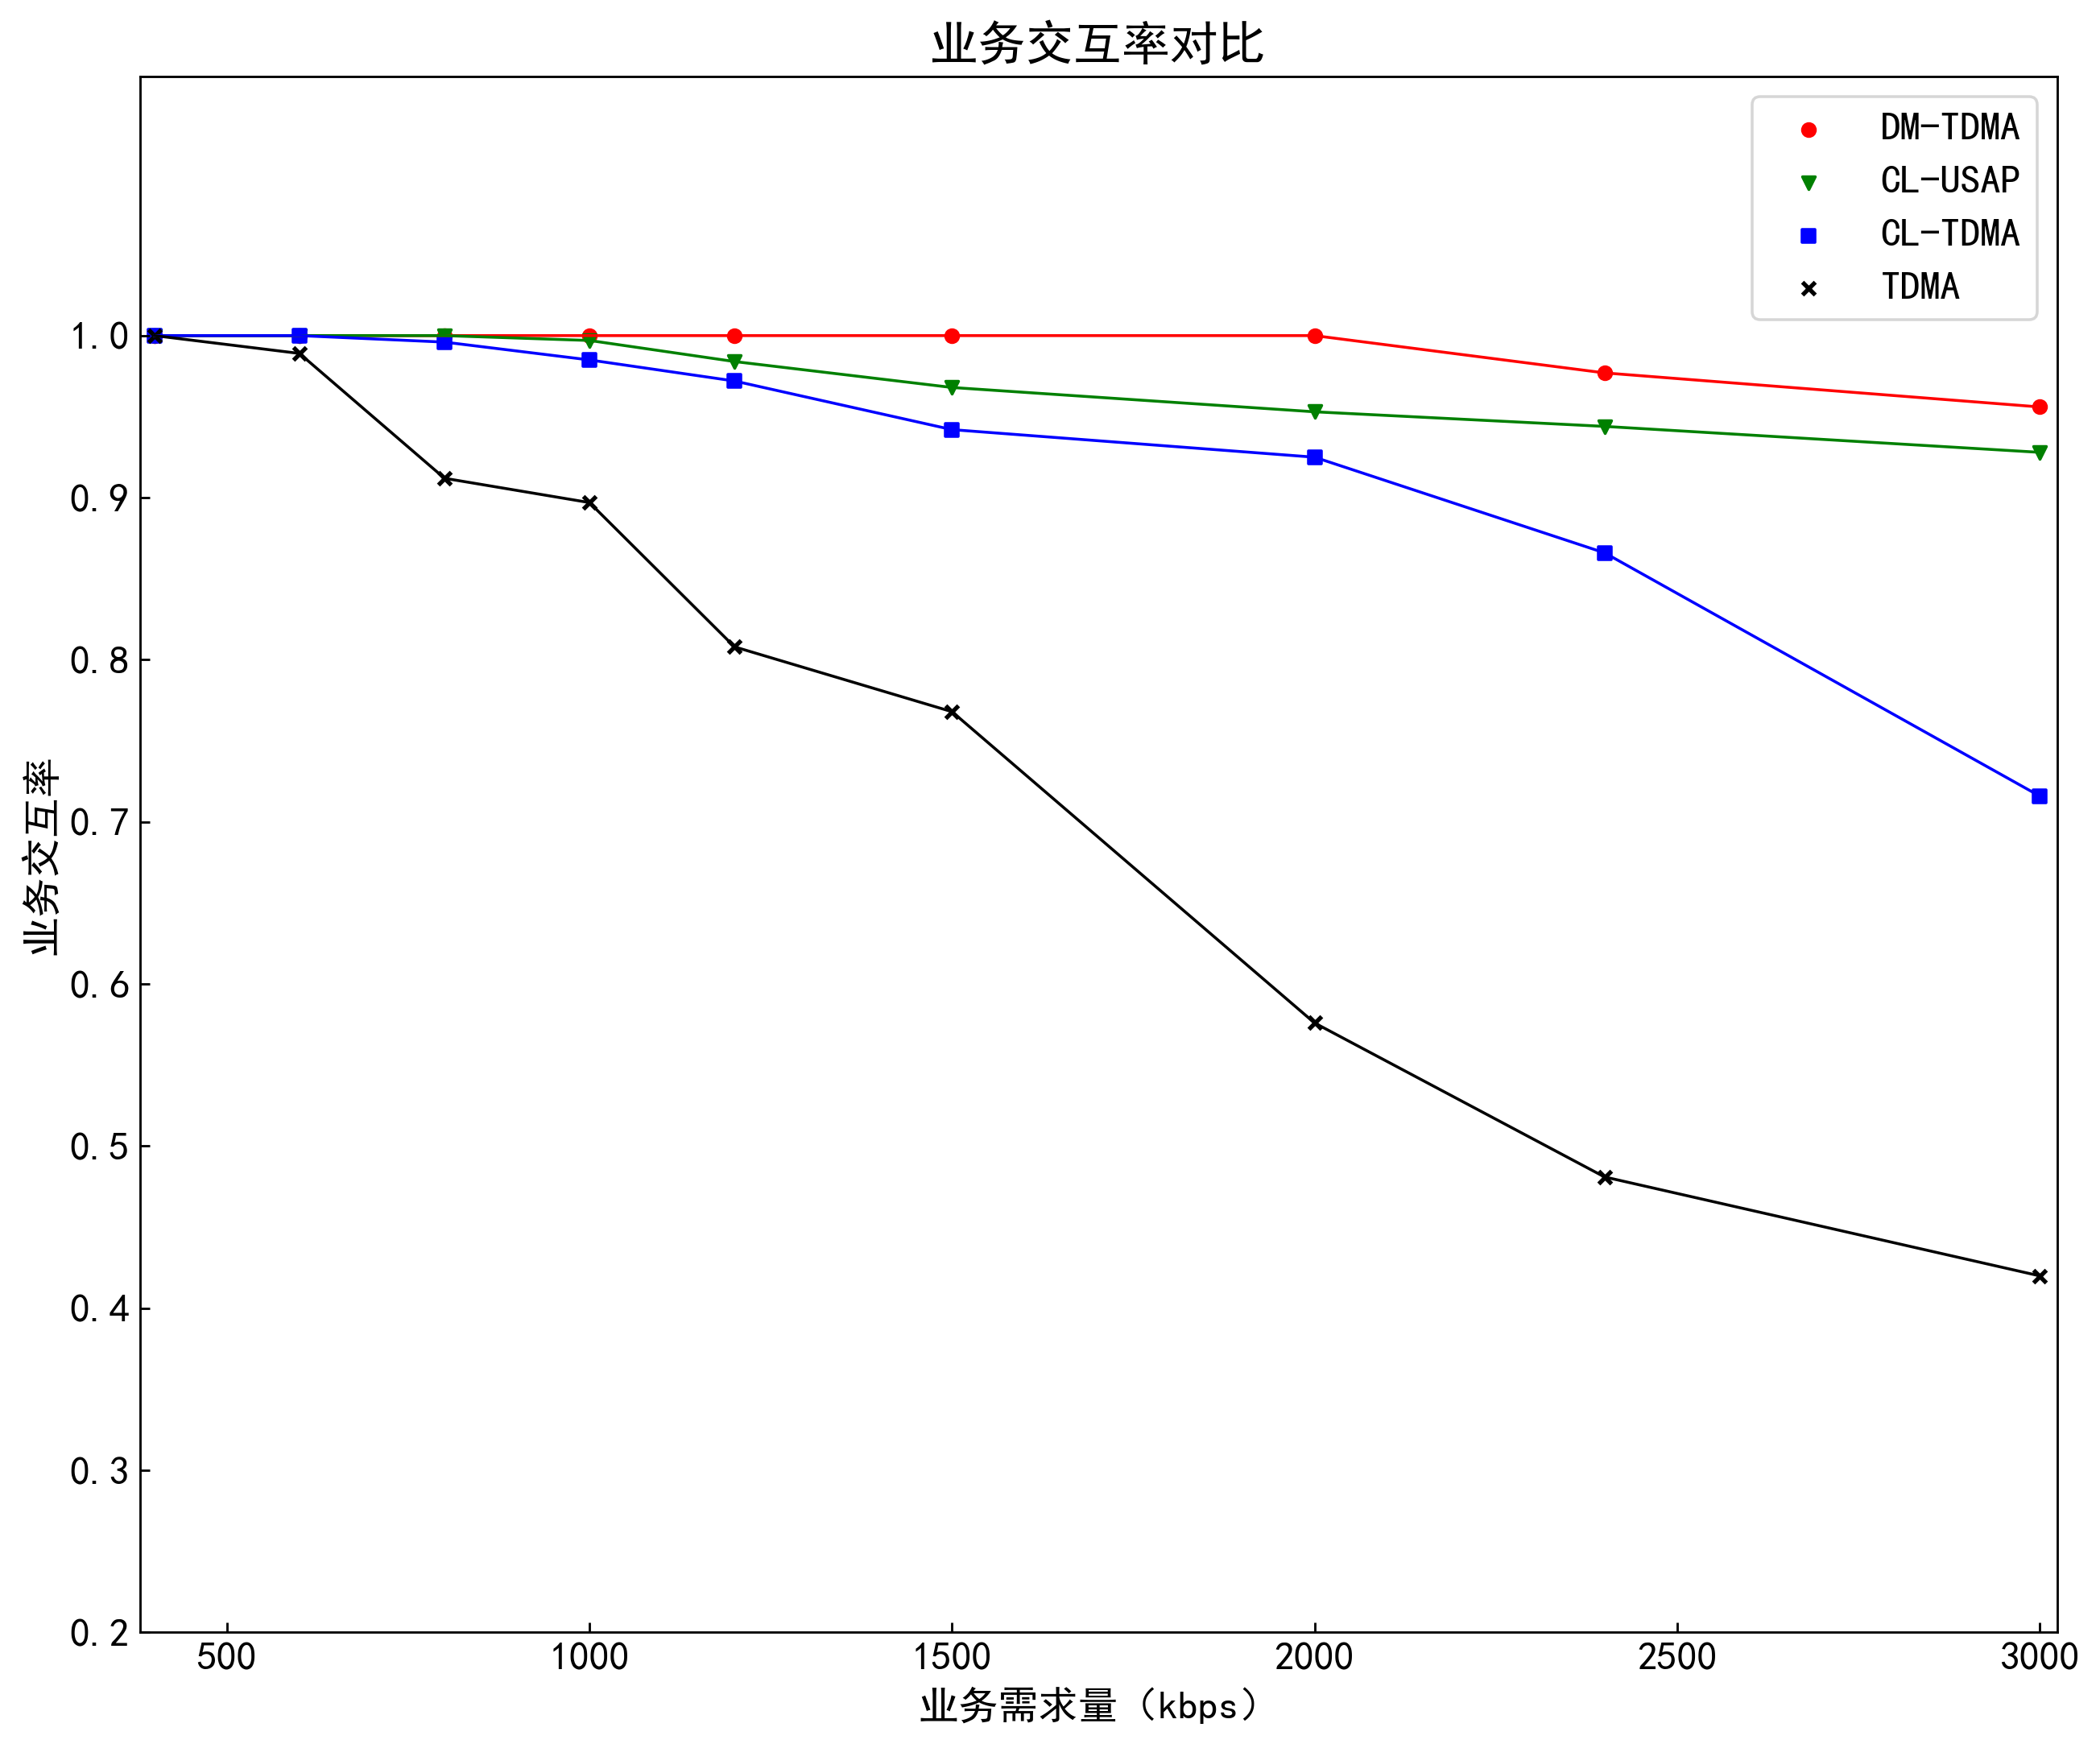

In [275]:
# Just a figure and one subplot
f, ax = plt.subplots(figsize=(12,10),dpi=256)
ax.set_ylim(0.2,1.16)
ax.set_yticks([0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
sucDataFrame['DM-TDMA'].plot(ax=ax,linewidth=1.00,c='r')
sucDataFrame['CL-USAP'].plot(ax=ax,linewidth=1.0,c='g')
sucDataFrame['CL-TDMA'].plot(ax=ax,linewidth=1.0,c='b')
sucDataFrame['TDMA'].plot(ax=ax,linewidth=1.0,c='black')
#ax.plot(x, y)
#ax.set_title('Simple plot')

sucDataFrame.plot(kind='scatter',x='offer',y='DM-TDMA',s=20,label='DM-TDMA',ax=ax,marker='o',c='r',xlim=(380,3024))
sucDataFrame.plot(kind='scatter',x='offer',y='CL-USAP',s=20,label='CL-USAP',ax=ax,marker='v',c='g',xlim=(380,3024))
sucDataFrame.plot(kind='scatter',x='offer',y='CL-TDMA',s=20,label='CL-TDMA',ax=ax,marker='s',c='b',xlim=(380,3024))
sucDataFrame.plot(kind='scatter',x='offer',y='TDMA',s=20,label='TDMA',ax=ax,marker='x',c='black',xlim=(380,3024))

plt.xlabel('业务需求量（kbps）')
plt.ylabel('业务交互率')
plt.title('业务交互率对比')
plt.savefig('SuccessFul Rate.png',bbox_inches='tight')
#plt.subplots(ncols=1,nrows=1)